# PySpark Example

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pyspark import SparkContext, SQLContext

## Lauching Spark's JVM.
sc = SparkContext("local[*]")

## Plot style configurations.
%matplotlib inline
plt.style.use('ggplot')

## A resonable size of plots
fsize = (12,8)

In [4]:
data = (sc.textFile('data/students_scores_samples.txt')
        ## Breaking lines into fields.
        .map(lambda line: line.split(','))
        ## Creating objects of different types.
        .map(lambda (date, student_id, score): (dt.datetime.strptime(date, '%Y-%m-%d'),
                                                student_id,
                                                float(score)))
        )
data.collect()

[(datetime.datetime(2014, 1, 20, 0, 0), u'A2', 4.0),
 (datetime.datetime(2014, 1, 15, 0, 0), u'A1', 1.5),
 (datetime.datetime(2014, 1, 21, 0, 0), u'A2', 5.0),
 (datetime.datetime(2014, 1, 21, 0, 0), u'A1', 5.0),
 (datetime.datetime(2014, 1, 22, 0, 0), u'A1', 3.0),
 (datetime.datetime(2014, 2, 10, 0, 0), u'A1', 2.0),
 (datetime.datetime(2014, 1, 15, 0, 0), u'A2', 1.0),
 (datetime.datetime(2014, 4, 22, 0, 0), u'A2', 3.5),
 (datetime.datetime(2014, 3, 1, 0, 0), u'A1', 4.5),
 (datetime.datetime(2014, 2, 25, 0, 0), u'A1', 2.0)]

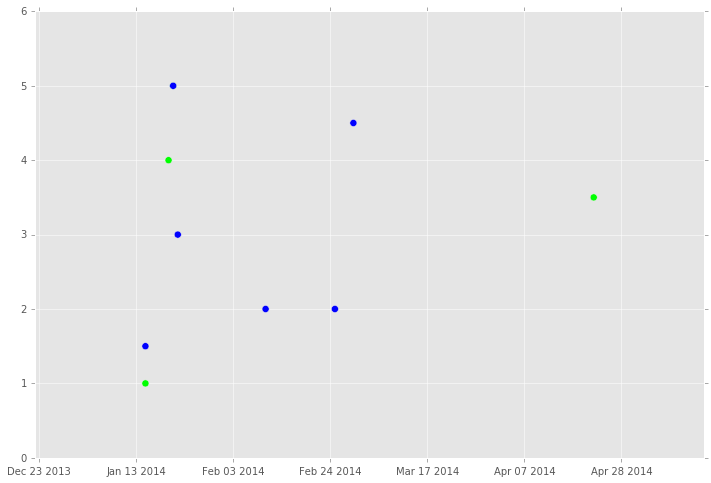

In [20]:
## Only dates.
x = data.map(lambda rec: rec[0]).collect()
## Only scores.
y = data.map(lambda rec: rec[2]).collect()
## List of 0s and 1s. 0 if student_id is 'A1'; 1 otherwise.
colors = data.map(lambda rec: 0 if rec[1] == 'A1' else 1).collect()

plt.figure(figsize=fsize)
plt.scatter(x=x, y=y, s=50, c=colors, cmap='brg')

In [26]:
sqlsc = SQLContext(sc)

dataframe = sqlsc.createDataFrame(data, ['date', 'student_id', 'score'])
dataframe.show()

+--------------------+----------+-----+
|                date|student_id|score|
+--------------------+----------+-----+
|2014-01-20 00:00:...|        A2|  4.0|
|2014-01-15 00:00:...|        A1|  1.5|
|2014-01-21 00:00:...|        A2|  5.0|
|2014-01-21 00:00:...|        A1|  5.0|
|2014-01-22 00:00:...|        A1|  3.0|
|2014-02-10 00:00:...|        A1|  2.0|
|2014-01-15 00:00:...|        A2|  1.0|
|2014-04-22 00:00:...|        A2|  3.5|
|2014-03-01 00:00:...|        A1|  4.5|
|2014-02-25 00:00:...|        A1|  2.0|
+--------------------+----------+-----+



In [27]:
dataframe.describe().show()

+-------+------------------+
|summary|             score|
+-------+------------------+
|  count|                10|
|   mean|              3.15|
| stddev|1.4729034063523803|
|    min|               1.0|
|    max|               5.0|
+-------+------------------+



In [28]:
import pyspark.sql.functions as sqlfn

(dataframe.groupBy('student_id')
 .agg(sqlfn.avg('score').alias('avg_score'),
      sqlfn.count('*').alias('num_exams'))
 .show()
)

+----------+---------+---------+
|student_id|avg_score|num_exams|
+----------+---------+---------+
|        A1|      3.0|        6|
|        A2|    3.375|        4|
+----------+---------+---------+

